## Handling skewness, class imbalance

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from sklearn.impute import SimpleImputer
import os

## Data Loading

In [2]:
# Get the notebook's directory
notebook_dir = os.path.dirname(os.path.abspath('__file__'))
project_root = os.path.dirname(notebook_dir)

# Build data path
data_path = os.path.join(project_root, 'data', 'cleaned_data.csv')

# Load data
df = pd.read_csv(data_path, index_col=0)
df.head()

,complains,charge_amount,seconds_of_use,frequency_of_use,frequency_of_sms,distinct_called_numbers,age_group,tariff_plan,status,customer_value,churn
0,0.0,0.0,4370.0,71.0,5.0,17.0,3.0,1.0,1.0,197.640,0.0
1,0.0,0.0,318.0,5.0,7.0,4.0,2.0,1.0,2.0,46.035,0.0
2,0.0,0.0,2453.0,60.0,359.0,24.0,3.0,1.0,1.0,1536.520,0.0
3,0.0,0.0,4198.0,66.0,1.0,35.0,1.0,1.0,1.0,240.020,0.0
4,0.0,0.0,2393.0,58.0,2.0,33.0,1.0,1.0,1.0,145.805,0.0


In [3]:
print(f'\nShape: {df.shape}')
print(f'\nDatatypes:\n{df.dtypes}')
print(f'\nMissing values count:\n{df.isnull().sum()}')


Shape: (3150, 11)

Datatypes:
complains                  float64
charge_amount              float64
seconds_of_use             float64
frequency_of_use           float64
frequency_of_sms           float64
distinct_called_numbers    float64
age_group                  float64
tariff_plan                float64
status                     float64
customer_value             float64
churn                      float64
dtype: object

Missing values count:
complains                  0
charge_amount              0
seconds_of_use             0
frequency_of_use           0
frequency_of_sms           0
distinct_called_numbers    0
age_group                  0
tariff_plan                0
status                     0
customer_value             0
churn                      0
dtype: int64


### Calculate the skew of a dataset and interpret the values


In [4]:
skewness = df.skew()
skewness

complains                  3.187956
charge_amount              2.584868
seconds_of_use             1.321943
frequency_of_use           1.144166
frequency_of_sms           1.974142
distinct_called_numbers    1.029402
age_group                  0.473642
tariff_plan                3.154514
status                     1.166046
customer_value             1.427292
churn                      1.885063
dtype: float64

Categorical/ binary features (ignoring skewness):

- complains (binary)
- charge_amount (ordinal)
- age_group (ordinal)
- tariff_plan (nominal)
- status (nominal)
- churn (binary)

Right-Skewed (1-2):

- frequency_of_sms (1.97): Most send few SMS, but some heavy texters
- customer_value (1.43): Most customers low value, some high-value customers
- seconds_of_use (1.32): Most use phone moderately, some power users
- frequency_of_use (1.14): Similar pattern - most moderate, some heavy users
- call_failure (1.09): Most have few failures, some experience many
- distinct_called_numbers (1.03): Most call few numbers, some call many

Left-Skewed:

- subscription_length (-1.30): Most customers are long-term subscribers, fewer new customers 

### Construct and interpret histograms and other plots to assess normality

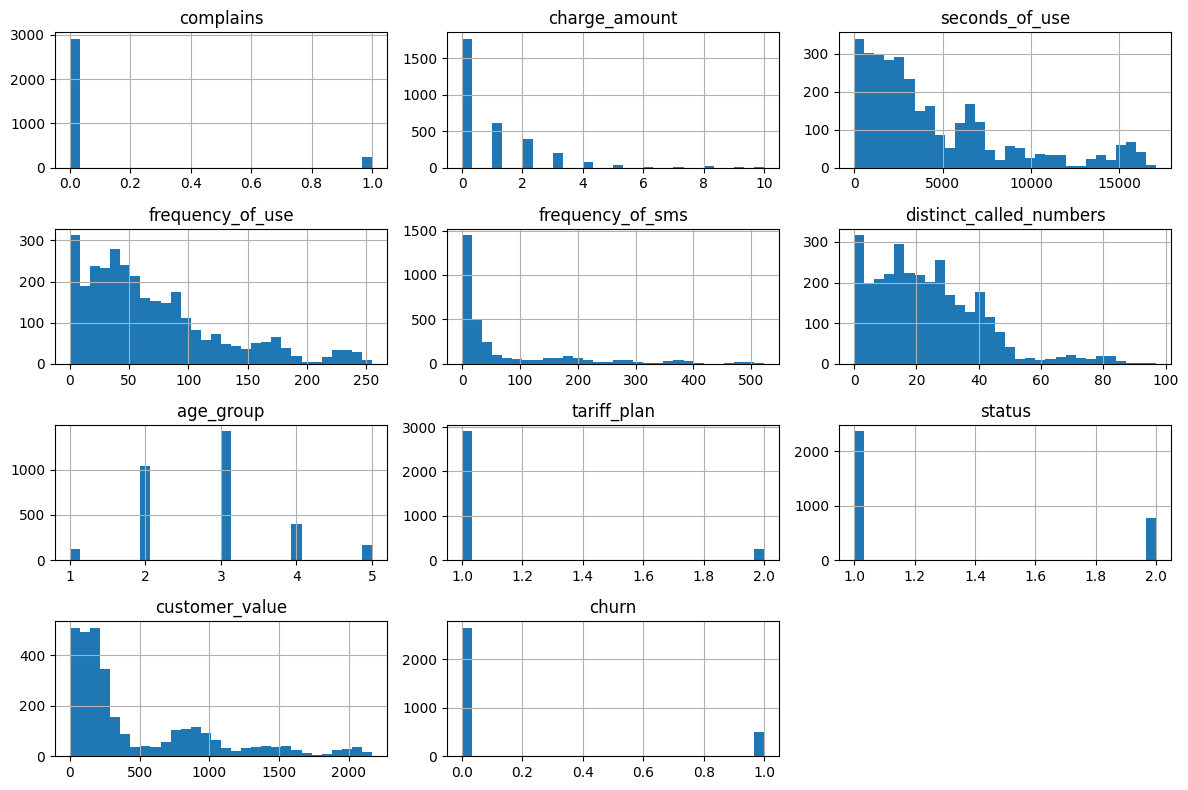

In [5]:
# Histograms of numeric features
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df[num_cols].hist(bins=30, figsize=(12,8))
plt.tight_layout()
plt.show()

### Transform skewed data

In [6]:
import numpy as np

df1 = df.copy()

# highly skewed
df1['frequency_of_sms_log'] = np.log1p(df1['frequency_of_sms'])
df1['charge_amount_log'] = np.log1p(df1['charge_amount'])

# moderately skewed
df1['customer_value_sqrt'] = np.sqrt(df1['customer_value'])
df1['seconds_of_use_sqrt'] = np.sqrt(df1['seconds_of_use'])
df1['frequency_of_use_sqrt'] = np.sqrt(df1['frequency_of_use'])
df1['distinct_called_numbers_sqrt'] = np.sqrt(df1['distinct_called_numbers'])


In [7]:
df1.skew().sort_values()

distinct_called_numbers_sqrt   -0.239916
frequency_of_sms_log           -0.188410
frequency_of_use_sqrt           0.054738
seconds_of_use_sqrt             0.335973
age_group                       0.473642
customer_value_sqrt             0.623720
charge_amount_log               0.959129
distinct_called_numbers         1.029402
frequency_of_use                1.144166
status                          1.166046
seconds_of_use                  1.321943
customer_value                  1.427292
churn                           1.885063
frequency_of_sms                1.974142
charge_amount                   2.584868
tariff_plan                     3.154514
complains                       3.187956
dtype: float64

complains                  3.187956
charge_amount              2.584868
seconds_of_use             1.321943
frequency_of_use           1.144166
frequency_of_sms           1.974142
distinct_called_numbers    1.029402
age_group                  0.473642
tariff_plan                3.154514
status                     1.166046
customer_value             1.427292
churn                      1.885063
dtype: float64

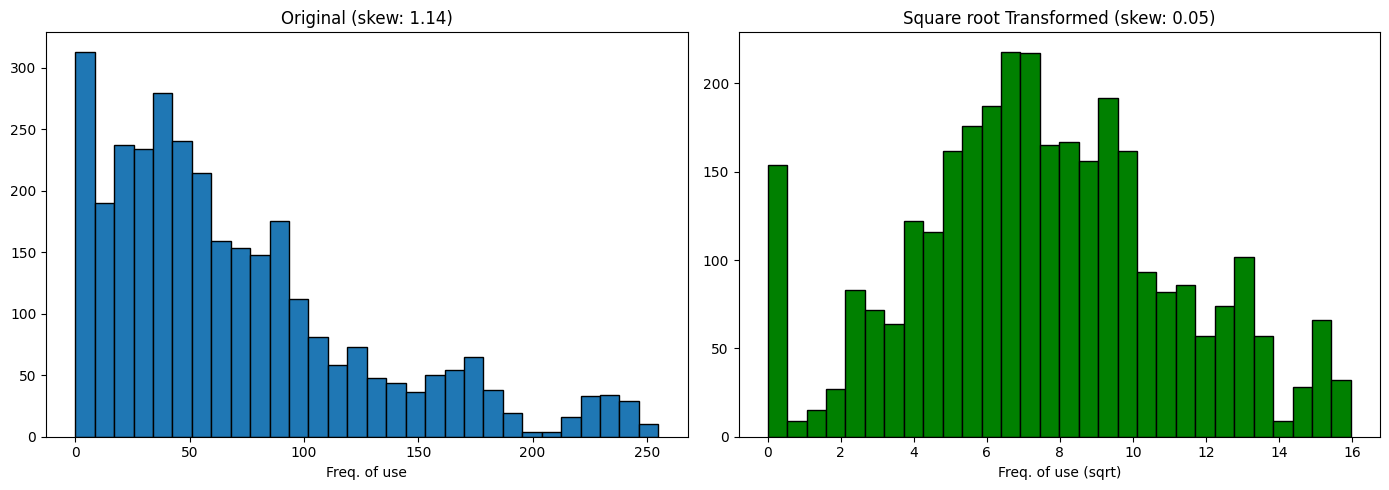

In [8]:
# Example
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Original
axes[0].hist(df1['frequency_of_use'], bins=30, edgecolor='black')
axes[0].set_title(f'Original (skew: {df1["frequency_of_use"].skew():.2f})')
axes[0].set_xlabel('Freq. of use')

# Transformed
axes[1].hist(df1['frequency_of_use_sqrt'], bins=30, edgecolor='black', color='green')
axes[1].set_title(f'Square root Transformed (skew: {df1["frequency_of_use_sqrt"].skew():.2f})')
axes[1].set_xlabel('Freq. of use (sqrt)')

plt.tight_layout()
plt.show()

Keeping following features even though high skewness as they are categorical/binary:

**1. complains**
* **Skew:** +3.188

**2. status**
* **Skew:** +1.166

**3. age_group**
* **Skew:** +0.473

**4. tariff_plan**
* **Skew:** +3.154

In [9]:
# dropping the features which has -0.05 > skewness > 0.05

df1.drop(columns= ['charge_amount', 'frequency_of_sms', 'distinct_called_numbers',
                  'customer_value', 'seconds_of_use', 'frequency_of_use'
                  ], inplace= True)

In [10]:
df1.shape

(3150, 11)

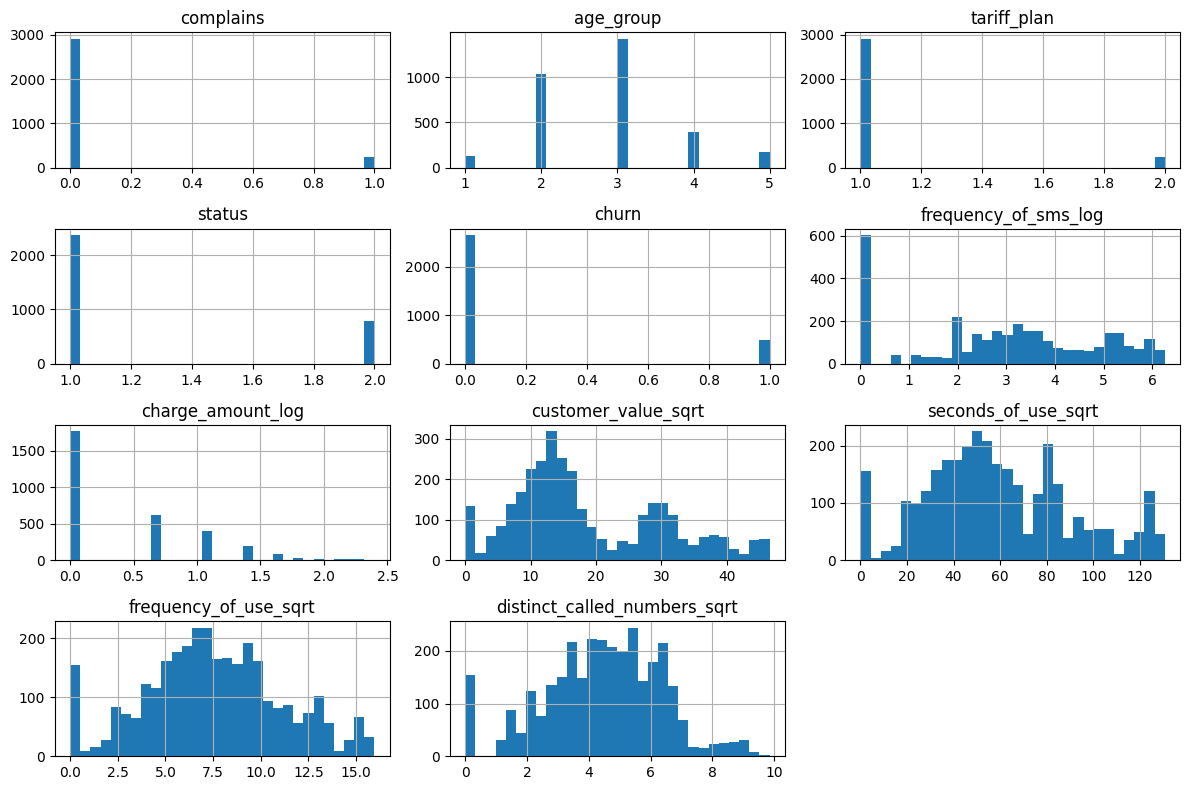

In [11]:
num_cols = df1.select_dtypes(include=[np.number]).columns.tolist()
df1[num_cols].hist(bins=30, figsize=(12,8))
plt.tight_layout()
plt.show()

In [12]:
data_path = os.path.join(project_root, 'data', 'unskewed_data.csv')

df1.to_csv(data_path)